In [1]:
import os

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-01-11 01:04:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.80, 216.58.220.208, 142.250.199.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: './pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0% 3.17M 26s
    50K .......... .......... .......... .......... ..........  0% 4.19M 23s
   100K .......... .......... .......... .......... ..........  0% 3.78M 23s
   150K .......... .......... .......... .......... ..........  0% 4.88M 21s
   200K .......... .......... .......... .......... ..........  0% 4.75M 21s
   250K .......... .......... .......... .......... ..........  0% 5.75M 20s
   300K .......... ....

  6950K .......... .......... .......... .......... ..........  8% 2.38M 21s
  7000K .......... .......... .......... .......... ..........  8% 5.99M 21s
  7050K .......... .......... .......... .......... ..........  8% 4.65M 21s
  7100K .......... .......... .......... .......... ..........  8% 2.36M 21s
  7150K .......... .......... .......... .......... ..........  8% 3.87M 21s
  7200K .......... .......... .......... .......... ..........  8% 4.25M 21s
  7250K .......... .......... .......... .......... ..........  8% 5.77M 21s
  7300K .......... .......... .......... .......... ..........  8% 4.32M 21s
  7350K .......... .......... .......... .......... ..........  8% 4.18M 21s
  7400K .......... .......... .......... .......... ..........  8% 5.79M 21s
  7450K .......... .......... .......... .......... ..........  8% 4.99M 21s
  7500K .......... .......... .......... .......... ..........  8% 5.92M 21s
  7550K .......... .......... .......... .......... ..........  8% 2.04M 21s

 15850K .......... .......... .......... .......... .......... 18% 4.75M 18s
 15900K .......... .......... .......... .......... .......... 18% 6.08M 18s
 15950K .......... .......... .......... .......... .......... 18% 3.61M 18s
 16000K .......... .......... .......... .......... .......... 18% 3.62M 18s
 16050K .......... .......... .......... .......... .......... 18% 3.69M 18s
 16100K .......... .......... .......... .......... .......... 18% 5.62M 18s
 16150K .......... .......... .......... .......... .......... 18% 2.21M 18s
 16200K .......... .......... .......... .......... .......... 18% 4.51M 18s
 16250K .......... .......... .......... .......... .......... 18% 3.69M 18s
 16300K .......... .......... .......... .......... .......... 19% 5.82M 18s
 16350K .......... .......... .......... .......... .......... 19% 3.14M 18s
 16400K .......... .......... .......... .......... .......... 19% 2.98M 18s
 16450K .......... .......... .......... .......... .......... 19% 6.05M 18s

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = "./pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer("mixed7")
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation="relu")(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation="sigmoid")(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])

In [6]:
# Define our example directories and files
base_dir = "./dataset/cats_and_dogs_filtered"

train_dir = os.path.join( base_dir, "train")
validation_dir = os.path.join( base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats") # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, "dogs") # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, "cats") # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = "binary", 
                                                    target_size = (150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        class_mode = "binary",
                                                        target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 1)

Epoch 1/20
100/100 [==============================] - 88s 882ms/step - loss: 0.3456 - accuracy: 0.8655 - val_loss: 0.1024 - val_accuracy: 0.9600
Epoch 2/20
100/100 [==============================] - 87s 866ms/step - loss: 0.2288 - accuracy: 0.9065 - val_loss: 0.0991 - val_accuracy: 0.9630
Epoch 3/20
100/100 [==============================] - 86s 862ms/step - loss: 0.1973 - accuracy: 0.9245 - val_loss: 0.1004 - val_accuracy: 0.9610
Epoch 4/20
100/100 [==============================] - 85s 855ms/step - loss: 0.2223 - accuracy: 0.9135 - val_loss: 0.1574 - val_accuracy: 0.9460
Epoch 5/20
100/100 [==============================] - 87s 873ms/step - loss: 0.1710 - accuracy: 0.9350 - val_loss: 0.0979 - val_accuracy: 0.9650
Epoch 6/20
100/100 [==============================] - 92s 919ms/step - loss: 0.1671 - accuracy: 0.9385 - val_loss: 0.1422 - val_accuracy: 0.9580
Epoch 7/20
100/100 [==============================] - 85s 847ms/step - loss: 0.1707 - accuracy: 0.9390 - val_loss: 0.1019 - val_ac

In [9]:
model.save("./trained_model/transfer_learning_cnn_cats_and_dogs")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./trained_model/transfer_learning_cnn_cats_and_dogs\assets


In [10]:
# model = tf.keras.models.load_model("trained_model/transfer_learning_cnn_cats_and_dogs")

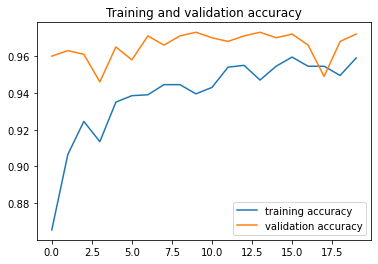

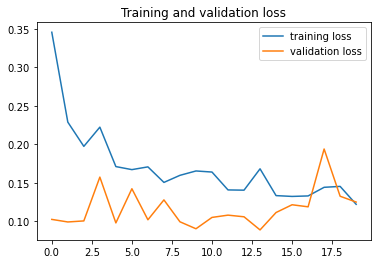

In [12]:
import matplotlib.pyplot as plt

epochs = range(len(history.history["loss"])) # Get number of epochs

plt.plot(epochs, history.history["accuracy"], label="training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, history.history["loss"], label="training loss")
plt.plot(epochs, history.history["val_loss"], label="validation loss")
plt.title("Training and validation loss")
plt.legend()